# Linear regression and logistic regression for computational neuroscience

**Zhuanghua Shi (Dec. 2nd, 2020)**

Inn neurobiologicla modeling we are often dealing with arrays of variables. For example, the activities of all of the neurons in a network at a given time, the firing rate of neuronn in each of many small epochs of time; the weights of all of the synapes impinging on a postsynapitc cell. The natural language for thinking about and analyzing the behavior of such arrays of variables is the language of vectors and matrices. 


## Matrix and Vector (Optional)

There are several arithmetic operations defined on vectors and matrices.

In [ ]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
print(3*a)
print(a - b)


[3 6 9]
[-3 -3 -3]


In [ ]:
x = np.random.random((5,5))
y = np.random.random((5,5))
print(x)
print(y)
print(x+y)

[[0.05491462 0.78273345 0.88603491 0.3592183  0.85036491]
 [0.69188389 0.52104915 0.84030971 0.01734402 0.31550732]
 [0.47882176 0.01493439 0.43001527 0.32330317 0.12311434]
 [0.80588462 0.9425507  0.01388475 0.84032303 0.67910847]
 [0.90236392 0.86344192 0.97584419 0.43834883 0.07534173]]
[[0.89481107 0.67596597 0.62455573 0.59430523 0.11791265]
 [0.01234299 0.40108628 0.493521   0.98342292 0.06462904]
 [0.54911854 0.08872745 0.93618064 0.21274724 0.90217274]
 [0.2377658  0.39759529 0.63636045 0.99360618 0.11179851]
 [0.7388838  0.72755473 0.36696047 0.02729125 0.80027528]]
[[0.9497257  1.45869942 1.51059064 0.95352353 0.96827756]
 [0.70422687 0.92213543 1.33383071 1.00076694 0.38013635]
 [1.0279403  0.10366185 1.36619591 0.53605041 1.02528708]
 [1.04365042 1.340146   0.6502452  1.83392921 0.79090698]
 [1.64124772 1.59099665 1.34280466 0.46564009 0.87561701]]


#### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. 



__Example__

Suppose we want to subtract the mean from an array __x__. We first demonstrate how we realize this using classic programming approach. And then we use broadcasting from numpy. 

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# second approach using broadcasting

xm = np.mean(x,axis = 1)
print(xm)
(x.T - xm).T


[ 2.  5.  8. 11.]


array([[-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.],
       [-1.,  0.,  1.]])

Question: Please write the matrix of the above implementation. 

### Multiplication

There are three types of multiplications for matrices. 

1. __Matrix multiply__

$$A_{m,n} B_{n,p} = 
 \begin{pmatrix}
  a_{0,0} &  \cdots & a_{0,n-1} \\
  a_{1,0} &  \cdots & a_{1,n-1} \\
  \vdots  &  \ddots & \vdots  \\
  a_{m-1,1}  & \cdots & a_{m-1,n-1} 
 \end{pmatrix} \begin{pmatrix}
  b_{0,0} &  \cdots & b_{0,p-1} \\
  b_{1,0} &  \cdots & b_{1,p-1} \\
  \vdots  &  \ddots & \vdots  \\
  b_{n-1,1}  & \cdots & b_{n-1,p-1} 
 \end{pmatrix} \\
 = \begin{pmatrix}
  \sum_j a_{0,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,o} \\
  \sum_j a_{1,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,1} \\
  \vdots  &  \ddots & \vdots  \\
  \sum_j a_{m-1,j}b_{j,o}  & \cdots & \sum_j a_{m-1,j}b_{j,p-1} 
 \end{pmatrix} $$

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
Y = np.array([[7,8],[9,10],[11,12]])
print(X)
print(Y)

[[1 2 3]
 [4 5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


In [ ]:
# multiple in python is X.dot(Y), or np.dot(X,Y)
# please check the finnal output dimension!
X.dot(Y)

array([[ 58,  64],
       [139, 154]])

In [ ]:
# Question: What is the output of Y.dot(X)?

# You code here
Y.dot(X)

array([[ 39,  54,  69],
       [ 49,  68,  87],
       [ 59,  82, 105]])

__2. Inner Product__

$X\cdot Y = [x_{ij}*y_{ij}]$

Note, inner product must be applied to the matrices with the __same dimension_!

In [ ]:
# please try to run X*Y, and see what is the output. 

X*Y.T 

array([[ 7, 18, 33],
       [32, 50, 72]])

#### Example

Suppose we have 4 neurons with initial values [1,2,1,2] and all send their signals to a postsynaptic cell with weights of [0.2, 0.3, 0.5 0.6], the postsynaptic cell receives input I will be:

$\sum(1,2,1,2) \cdot (0.2,0.3,0.5,0.6) = (1,2,1,2) 
\begin{pmatrix}0.2 \\ 0.3 \\ 0.5 \\ 0.6\end{pmatrix}$

In [ ]:
# implementation
neurons = np.array([1,2,1,2])
weights = np.array([0.2, 0.3, 0.5, 0.6])
I = np.sum(neurons*weights)
print(I)

2.5


In [ ]:
# alternative implementation using matrix
np.inner(weights, neurons)


2.5

__3. Outer product__

please try yourself to see what the output of $neurons^T\cdot weights$ is. 

In [ ]:
# 
np.outer(weights, neurons)

array([[0.2, 0.4, 0.2, 0.4],
       [0.3, 0.6, 0.3, 0.6],
       [0.5, 1. , 0.5, 1. ],
       [0.6, 1.2, 0.6, 1.2]])

## 1. Linear Regression
A linear regression is to find a relation between the output $y$ and input $X$ in a linear relationship. In mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

where the vector $w = (w_1,..., w_p)$ as ``coef_`` and $w_0$ as ``intercept_``.

`LinearRegression` fits a linear model with coefficients
$w = (w_0, ..., w_p)$ to minimize the residual sum
of squares between the observed targets in the dataset, and the
targets predicted by the linear approximation. Mathematically it
solves a problem of the form:

$$ \min_{w} || X w - y||_2^2$$

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)


### 5 Steps for linear regression

1. Import packages
2. provide data
3. create a regression model and fit it with existing data
4. check the results of the model (goodness of fit)
5. apply the model for predictions



## Linear Regression with statsmodels

`statsmodels` provides more statistics and other statistical models, as well as for conducting statistical tests, and statistical data exploration. On Monday in Psychophyiscs lecture, we have use this package for repeated measures ANOVA. Now we do the linear regression for the housing data using statsmodels here. 

Here we use a real data example - Boston Housing dataset, which contains information about various houses in Boston through different parameters.

There are 506 samples and 13 features variables in this dataset. The objective is to predict the value of prices of the house using the given features. This dataset is included in scikit-learn package.

Let's start by importing some libraries.

In [ ]:
import statsmodels.api as sm

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
boston = datasets.load_boston()

import numpy as np
import pandas as pd

bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
print(bos.head())

X = bos.drop('Price', axis = 1)
y = bos['Price']


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


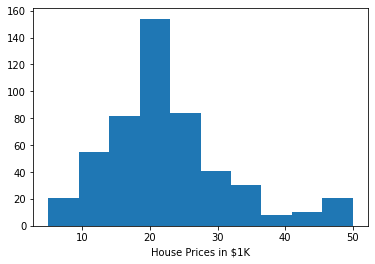

In [ ]:
# now let's check the histogram of the price
plt.hist(bos.Price)
plt.xlabel('House Prices in $1K')
plt.show()

Many features (input variables) are not independent in real situation. So let's see their correlations.

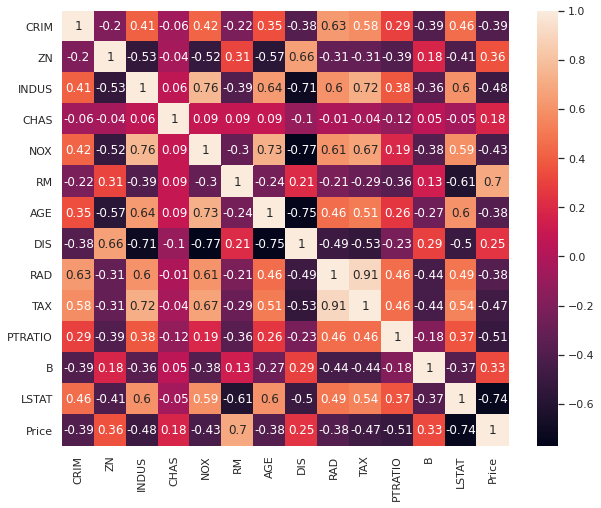

In [ ]:
 
# calculate correlation using .corr() from pandas
correlation_matrix = bos.corr().round(2)
sns.set(rc={'figure.figsize':(10,8)}) #set figure size a bit larger
sns.heatmap(data=correlation_matrix, annot=True)

In `statsmodels`, the linear regression is called 'ordinary least square' (OLS). There are other linear regression models (Generalized least squares, weighted least squares, linear mixed effects models), which we will not cover here. If you are interested in those, please refer to [the official website](https://www.statsmodels.org/dev/examples/index.html#linear-regression-models).

In [ ]:
Xc = sm.add_constant(X)
# linear model OLS
model = sm.OLS(y,Xc).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        16:40:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

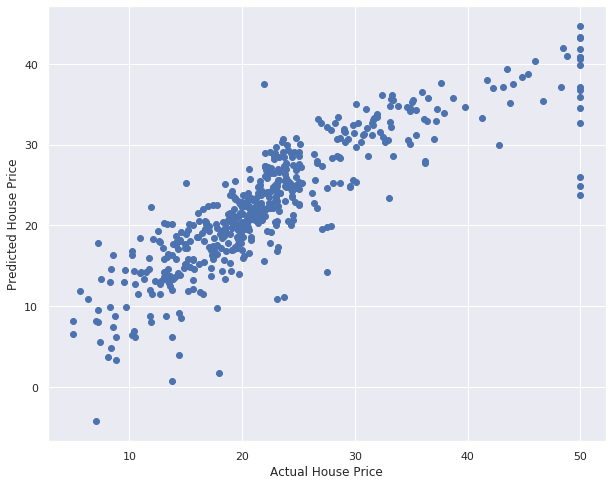

In [ ]:
y_hat = model.predict(Xc)

plt.scatter(y, y_hat)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.show()

## Linear regression with scikit-learn



In [ ]:
#1. Import relevant packages
import numpy as np  # for matrix and array
from sklearn.linear_model import LinearRegression


You can provide several optional parameters to LinearRegression:

* __fit_intercept__ is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
* __normalize__ is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
* __copy_X__ is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
* __n_jobs__ is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.




### Excerise - Linear regression

Here is a [dataset](https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv) that contains the salary and Experience. Let's explore the data and do linear regression

In [ ]:
import numpy as np  # for matrix and array
import pandas as pd # package for import/export data
import pylab as pyl  # plotting
from sklearn.linear_model import LinearRegression

# import csv file using pandas.read_csv
dataset = pd.read_csv('https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv')

dataset.tail(10)
#dataset.describe()

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


First step to visualize the data (e.g., scatterplot).

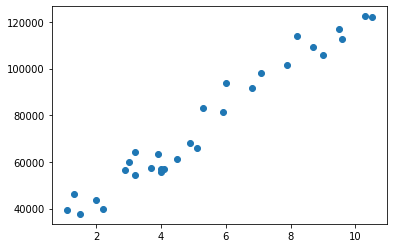

In [ ]:
pyl.scatter(dataset['YearsExperience'], dataset.Salary)

It has strong linear relationship!

In [ ]:
# we fit model 
model = LinearRegression()  # create a model
model.fit(dataset.YearsExperience.values.reshape(-1, 1), dataset.Salary.values) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's print the coefficients
print(model.intercept_)
print(model.coef_)

25792.200198668696
[9449.96232146]


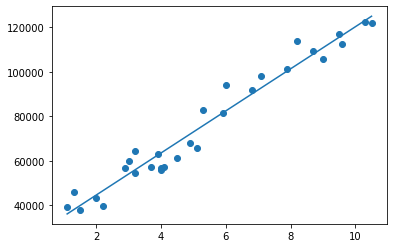

In [ ]:
# predict via estimated linear model
sallary_hat = model.predict(dataset.YearsExperience.values.reshape(-1,1))
# visualize the predicted sallaries vs. observed sallaries
pyl.scatter(dataset.YearsExperience, dataset.Salary)
pyl.plot(dataset.YearsExperience, sallary_hat)
pyl.show()

## Multivariate linear regression

Here we use the same real data example we used above - Boston Housing dataset, which contains information about various houses in Boston through different parameters. 


In [ ]:
import numpy as np      #deal with array matrix
import pandas as pd     #deal with table data, import, expojrt

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline


#imports from sklearn library
from sklearn import datasets
from sklearn.linear_model import LinearRegression



We then import the data, and explore data. This step (Explorative Data Analysis, EDA) is important to gain insight to the data and their structures. 


In [ ]:

#loading the dataset direclty from sklearn
boston = datasets.load_boston()
print(type(boston))
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Let's see the description of the data. 

Now let's make the dataset nicer using pandas (table-like data)

In [ ]:
# let's first convert the raw data to table-like data. 
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
bos.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Your task

Please inspect the above correlation matrix, and see which factors are important for predicting house price, and note down here:

__Your notes here...__

In [ ]:
X = bos.drop('Price', axis = 1)
y = bos['Price']

reg_all = LinearRegression()
reg_all.fit(X, y)
y_hat = reg_all.predict(X)
r2 = round(reg_all.score(X,y),2)
print('R2 score is {}'.format(r2))

R2 score is 0.74


Text(0, 0.5, 'Predicted House Price')

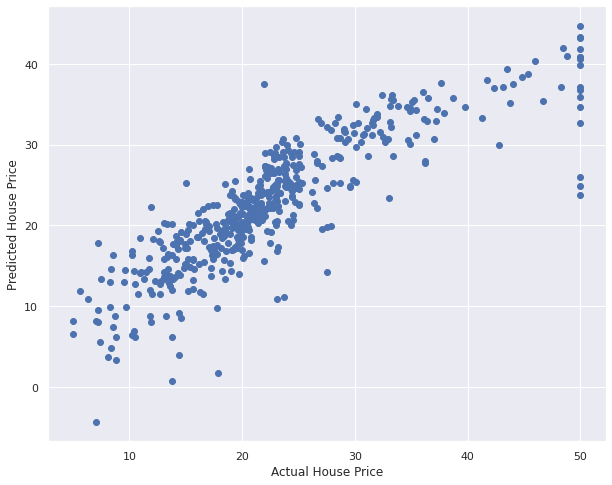

In [ ]:
plt.scatter(y, y_hat)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')

### food for thought

* We used all features / variables in multiple regression, but those features are covaried. What should those covariate feature be treated?

* Would it be potential prone to overfitting?

## 2. Logistic Regressionn 

Logistic Regression is an important activation function and Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary decision variable that contains two categories: 1 (yes, success, choice 1, etc.) or 0 (no, failure, choice 2, etc.). In other words, the logistic regression model predicts one choice P(Y=1) as a function of inputs X in 2AFC.

## Logistic regression with scikit-learn

Recall that a linear regression is to find a relation between the dependent variable $y$ and input $X$ in a linear relationship. In mathematical notation, 

$$y = w_0 + w_1 x_1 + ... + w_p x_p$$

where the vector $w = (w_1,..., w_p)$ as ``coef_`` and $w_0$ as ``intercept_``.

The logistic regression further assume the $y$ is a log-likehood ratio between two choices (e.g., Yes vs. No). 

$$\log \frac p {1-p} = y = w'X$$


 Python `sklearn.linear_model` provide `LogisticRegression()` model. The steps of doing logistic regression is similar to what we learned in the session of 'Linear Regression'. 

 Here we do an excercise on a hypothetical dataset, which is adapted from [this tutorial](https://datatofish.com/logistic-regression-python/). 


### Dataset

Suppose there are three features (independent variables) GMAT score, GPA score and Work experience determines the admission (1 Yes, 0 No). 
We would like to find our which factors really matters. 

In [ ]:
#1. Import relevant packages
import numpy as np  # for matrix and array
import pandas as pd # dealing with matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sn # for visualization
import pylab as pyl

#2. Provide data
# Here are hypothetical data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
# from dictionary to a data table
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head(10) # show the first 10 rows

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


Now we create a model to fit the data. 

In [ ]:
# 3. create a model
model = LogisticRegression()
# 4. fit the model
X = df[['gmat','gpa','work_experience']]
y = df['admitted']
model.fit(X,y)
# print the R^2
print(model.score(X,y))


1.0


In [ ]:
# check the fitted coefficiencies
print(model.coef_)

# and see the predict results
# 5. predict the results
y_hat = model.predict(X)

# check the predict accuracy
accuracy = y_hat == y
print(accuracy.values)

[[0.06848285 0.72419888 1.48452727]]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


## Logistic regression using Statsmodels

Now we do an exercise on a psychological dataset, collected by master student Phillippa. The data can be found [here](https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv). 

In the study, same classic music pieces were manipulated and played in three different tempo: slow, medium, and faster. The length of the music piece was randomly select from 2 to 8 seconds. Participants had to judge if the music piece was a ‘short’ or a ‘long’ one. Participants had to estimate the ‘short’ or ‘long’ based on the past trials they received. The research question is if the music tempo alters the time judgment.

In Statsmodels, we can use `.Logit()` function to fit logistic model. 


In [ ]:
dat = pd.read_csv('https://raw.githubusercontent.com/strongway/r-statistics/master/data/music_bisection.csv', sep = ';')
dat.head()


,Participant,Duration,Tempo,Stimuli_Nu,Decision,Music_Duration
0,Sub101,2,1,10,1,2.001604
1,Sub101,6,3,10,2,6.000169
2,Sub101,5,1,4,2,5.000097
3,Sub101,7,1,8,2,7.000105
4,Sub101,2,3,1,1,2.000080


In [ ]:
#let's check how many subjects in the dataset
dat.Participant.unique()

array(['Sub101', 'Sub102', 'Sub103'], dtype=object)

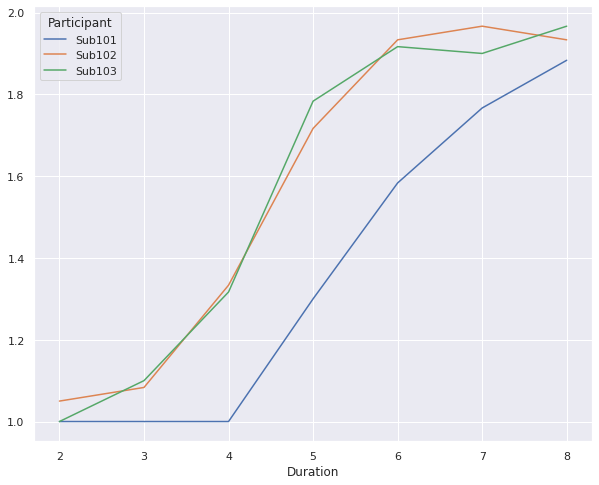

In [ ]:
# quickly visualize responses for three participants
dat.pivot_table( 'Decision', 'Duration','Participant' ).plot()

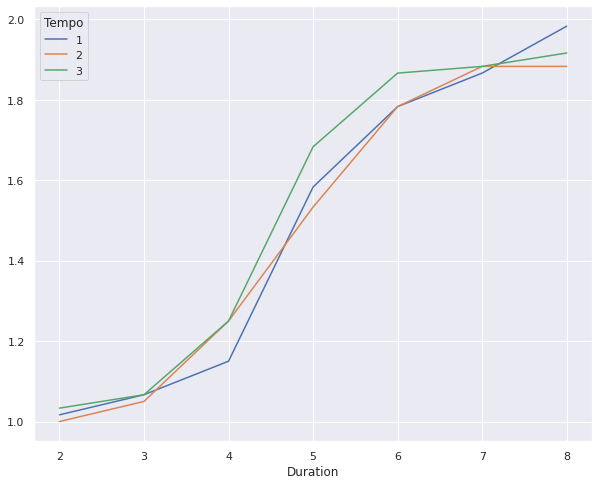

In [ ]:
# quickly visualize responses for three Tempi
dat.pivot_table( 'Decision', 'Duration','Tempo' ).plot()

In [ ]:
# 3. we want to estimate individual conditions for individual participant, so we first get out unique subjects and unique tempi. 

Subjects = dat.Participant.unique()
Tempi = dat.Tempo.unique()
dat = dat.assign(resp = dat.Decision -1)
#store thresholds 
thresholds = pd.DataFrame(np.zeros((3,3)),index = Subjects,columns = Tempi)

for sub in Subjects:
  for Tempo in Tempi:
    curDat = dat.query(f"Participant == '{sub}' & Tempo == {Tempo}")
    X = sm.add_constant(curDat.Duration) # we need the intercept, so add a contant column 1 here
    log_reg = sm.Logit(curDat.resp,X).fit()
    # below is calcualte the threshold p=0.5, x = - a/b (details in another session in Psychophysics)
    thresholds.loc[sub, Tempo] = - log_reg.params.const/log_reg.params.Duration 
    print([sub, Tempo])
    print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.263577
         Iterations 8
['Sub101', 1]
                           Logit Regression Results                           
Dep. Variable:                   resp   No. Observations:                  140
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            1
Date:                Sun, 29 Nov 2020   Pseudo R-squ.:                  0.5870
Time:                        18:37:23   Log-Likelihood:                -36.901
converged:                       True   LL-Null:                       -89.341
Covariance Type:            nonrobust   LLR p-value:                 1.297e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6502      1.875     -5.680      0.000     -14.325      -6.975
Duration       

In [ ]:
# Now let's check the thresholds (in seconds)
thresholds

,1,3,2
Sub101,6.158646,5.673695,6.132493
Sub102,4.347650,4.309980,4.744174
Sub103,4.642341,4.396651,4.481357


In [ ]:
# check the fast and slow tempo difference
thresholds.loc[:,1] - thresholds.loc[:,3]

Sub101    0.484951
Sub102    0.037670
Sub103    0.245690
dtype: float64

## Resources

* [Linear Algebra for Theoretical Neuroscience by Ken Miller](http://www.columbia.edu/cu/neurotheory/Ken/math-notes/) 
* [Mathematics for Computational Neuroscience & Imaginng by John Porrill.](https://www.sheffield.ac.uk/polopoly_fs/1.13304!/file/maths.pdf) 
